# inicialización

In [2]:
# funciones
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')
from fun_gilles import *
import pickle

title_fs = 16
label_fs = 15
tick_fs = 14
legend_fs = 14

In [3]:
def plot(abundances, times, V, species):
    colors = plt.get_cmap("Set2").colors

    # 1. Font sizes
    title_fs = 16
    label_fs = 15
    tick_fs = 14
    legend_fs = 14

    # 2. Use gridspec_kw to set height ratios
    # Here [3, 1] means the first row is 3x taller than the second
    fig, axes = plt.subplots(
        nrows=2, 
        ncols=1, 
        sharex=True, 
        figsize=(7,5.5), 
        gridspec_kw={'height_ratios': [1.5, 1]}
    )

    # --- Subplot 1 (Top): Concentration ---
    ax1 = axes[0]
    for i in range(len(species)):
        ax1.plot(times, abundances[:, i] / V, label=species[i], color=colors[i], linewidth= 1.6)
    
    ax1.grid(True, linestyle='--', alpha=0.3)
    ax1.set_ylabel("Concentration", fontsize=label_fs)
    ax1.set_title("Concentration Evolution", fontsize=title_fs)
    ax1.tick_params(axis='both', labelsize=tick_fs)

    # --- Subplot 2 (Bottom): Volume ---
    ax2 = axes[1]
    ax2.plot(times, V, color='gray')
    ax2.grid(True, linestyle='--', alpha=0.3)
    ax2.set_xlabel("Time", fontsize=label_fs)
    ax2.set_ylabel("Volume", fontsize=label_fs)
    ax2.set_title("Volume Evolution", fontsize=title_fs)
    ax2.tick_params(axis='both', labelsize=tick_fs)
    # --- Legend ---
    ax1.legend(loc='center left', 
               bbox_to_anchor=(1., 0.5), 
               fontsize=legend_fs, 
               title_fontsize=legend_fs + 2)

    plt.tight_layout()
    plt.show()

In [4]:
def plot_abundances(abundances, times, species):
    colors = plt.get_cmap("Set2").colors

    # 1. Font sizes
    title_fs = 16
    label_fs = 15
    tick_fs = 14
    legend_fs = 14

    # 2. Use gridspec_kw to set height ratios
    # Here [3, 1] means the first row is 3x taller than the second
    plt.figure(figsize=(6,4))

    # --- Subplot 1 (Top): Concentration ---
    
    for i in range(len(species)):
        plt.plot(times, abundances[:, i], label=species[i], color=colors[i], alpha=0.9, linewidth= 2)
    
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.ylabel("Abundances", fontsize=label_fs)
    plt.title("Abundances Evolution", fontsize=title_fs)
    plt.tick_params(axis='both', labelsize=tick_fs)
    
    # --- Legend ---
    plt.legend(loc='center left', 
               bbox_to_anchor=(1., 0.5), 
               fontsize=legend_fs, 
               title_fontsize=legend_fs + 2)

    plt.tight_layout()
    plt.show()

In [5]:
def load_streamed_pickle(filename):
    data = {}
    try:
        with open(filename, "rb") as file:
            while True:
                try:
                    # Load one object (which is a dict of {k_i: (abundances, times, volumes)})
                    chunk = pickle.load(file)
                    # Merge the loaded chunk into the main dictionary
                    data.update(chunk)
                except MemoryError:
                    break
                except EOFError:
                    # Reached the end of the file
                    break
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
    
    print(f"Successfully loaded {len(data)} simulation results.")
    return data

def load_list_pickle(filename):
    data = []
    try:
        with open(filename, "rb") as file:
            while True:
                try:
                    # Load one object (which is a dict of {k_i: (abundances, times, volumes)})
                    chunk = pickle.load(file)
                    # Merge the loaded chunk into the main dictionary
                    data.append(chunk)
                except EOFError:
                    # Reached the end of the file
                    break
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
    
    print(f"Successfully loaded {len(data)} simulation results.")
    return data

# XY

Criterion for stop was # of iterations
['x' 'y' 'xy']


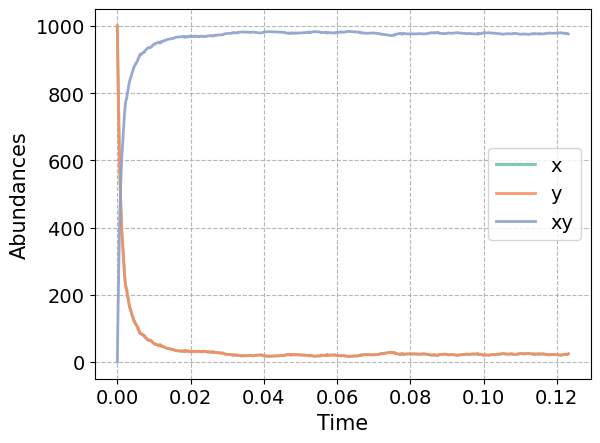

In [9]:
kinetic_k = [1,1]
initial_conditions = [1000,1000,0]
vol = 1
file_XY = "../examples/reactions_XY.txt"

ab, tim, vols = chemistry(method= "Gillespie",
                          iterations= int(1200),
                          file= file_XY,
                          initial_food= initial_conditions,
                          k= kinetic_k,
                          V= vol                          
                          )
plt.figure()
colors = plt.get_cmap('Set2').colors
plt.grid()
species_XY = obtain_species(read_file(file_XY))
print(species_XY)
for i in range(len(species_XY)):
    
    plt.plot(tim, ab[:, i], label=species_XY[i], color=colors[i], alpha=0.9, linewidth= 2)

plt.grid(True, linestyle='--', alpha=0.9)
plt.xlabel("Time", fontsize= label_fs)
plt.ylabel("Abundances", fontsize= label_fs)
plt.legend(fontsize= legend_fs)
plt.tick_params(axis='both', labelsize= tick_fs)

# XYC 

Criterion for stop was # of iterations


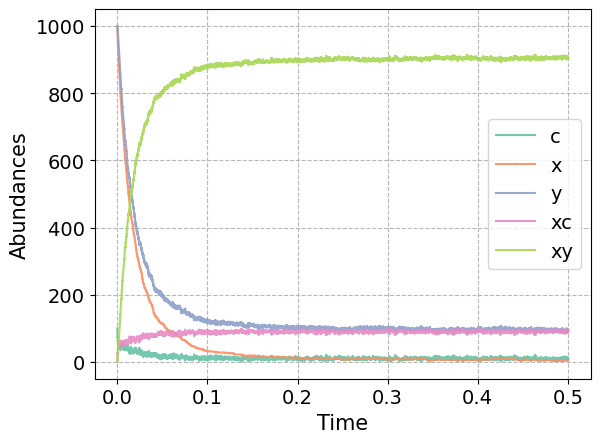

In [13]:
initial_c = [100]+[1000]*2+[0]*2
k = [1]*4
iterations = 20000
V = 1
method = "Gillespie"
f = "../examples/reactions_XYC.txt"
abundances, times, V = chemistry(method, iterations, f, initial_c, k, V)
species = obtain_species(read_file(f))

plt.figure()
colors = plt.get_cmap('Set2').colors
plt.grid()

for i in range(len(species)):
    plt.plot(times, abundances[:, i], label=species[i], color=colors[i], alpha=0.9)

plt.grid(True, linestyle='--', alpha=0.9)
plt.xlabel("Time", fontsize= label_fs)
plt.ylabel("Abundances", fontsize= label_fs)
plt.legend(fontsize= legend_fs)
plt.tick_params(axis="both", labelsize= tick_fs)
plt.show()


Successfully loaded 1 simulation results.


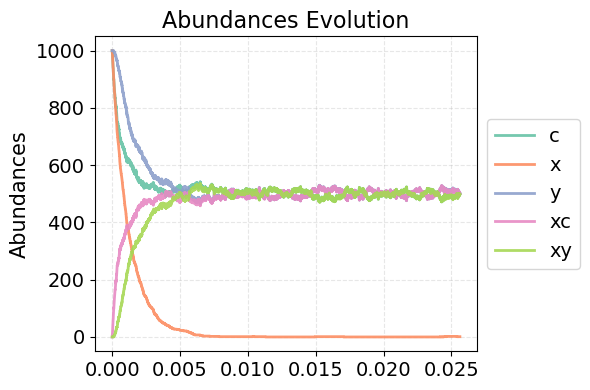

In [54]:
species = obtain_species(read_file('../examples/reactions_XYC_food.txt'))
abundances, times, V = load_list_pickle('../practicas/xyc_gillespie.pkl')[0]
plot_abundances(abundances[:-200,:], times[:-200], species)

Successfully loaded 1 simulation results.


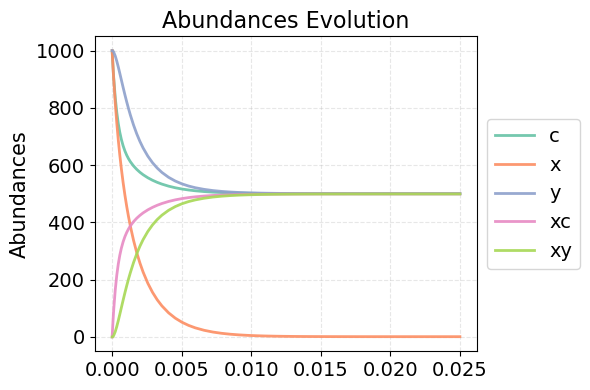

In [55]:
species = obtain_species(read_file('../examples/reactions_XYC_food.txt'))
abundances, times, V = load_list_pickle('../practicas/xyc_deterministic.pkl')[0]
plot_abundances(abundances, times, species)

Successfully loaded 1 simulation results.


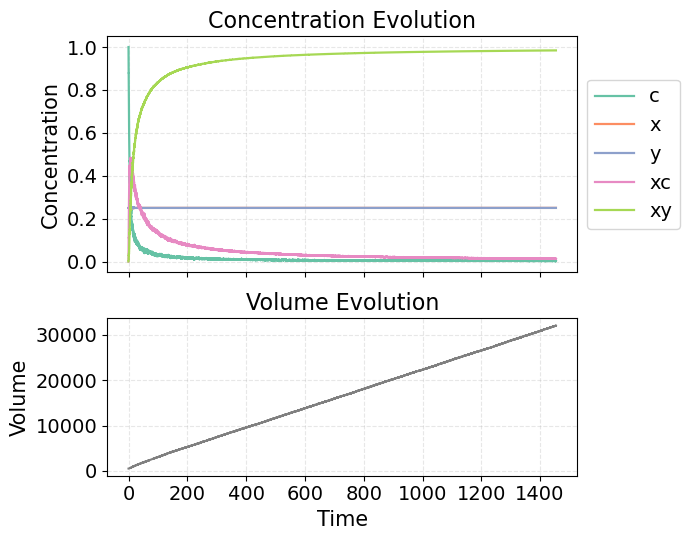

In [56]:
species = obtain_species(read_file('../examples/reactions_XYC_food.txt'))
abundances, times, V = load_list_pickle('../practicas/XYC_protocell.pkl')[0]
plot(abundances, times, V, species)

Successfully loaded 1 simulation results.


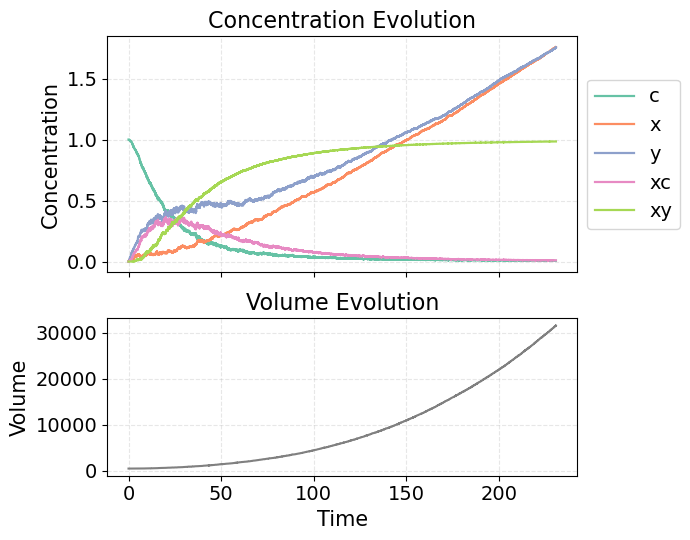

In [11]:
results = load_list_pickle('../drago_results/XYC_ctflux.pkl')

a, t, v = results[-1]
species = obtain_species(read_file("../examples/reactions_XYC_food.txt"))
plot(a, t, v, species)

# ABCD - bien

Successfully loaded 1 simulation results.


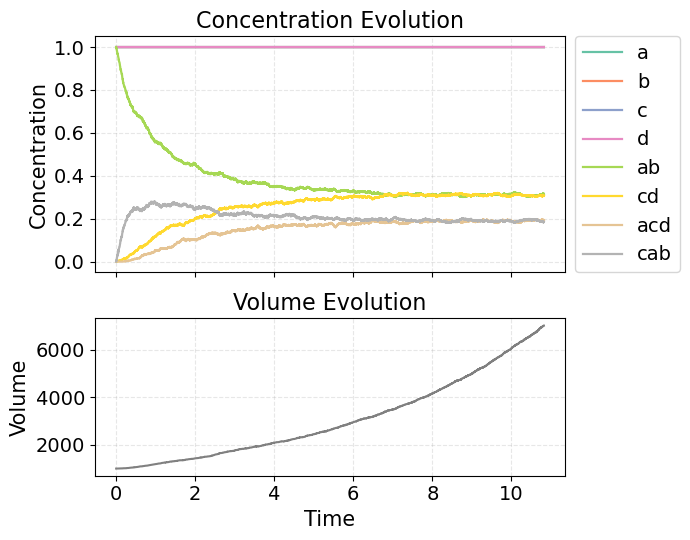

In [58]:
species = obtain_species(read_file('../examples/reactions_autocat.txt'))
abundances, times, V = load_list_pickle('abcd_protocell.pkl')[0]
plot(abundances, times, V, species)

['a' 'b' 'c' 'd' 'ab' 'cd' 'acd' 'cab']


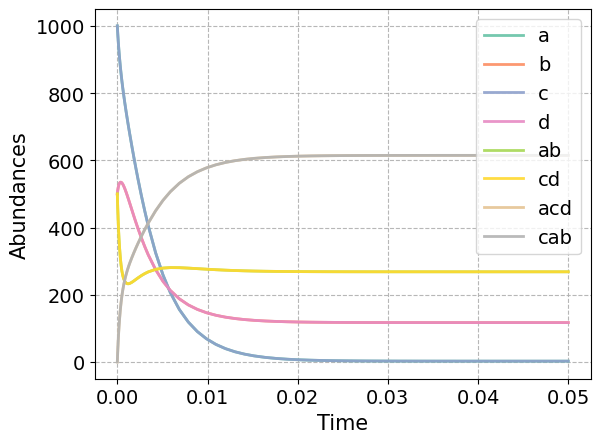

In [25]:
kinetic_k = [1]*8+[0.]*4
initial_conditions = [1000,500]*2+[500]*2+[0]*2
vol = 1
file_XY = "../examples/reactions_autocat.txt"

ab, tim, vols = chemistry(method= "Deterministic",
                          iterations= 0.05,
                          file= file_XY,
                          initial_food= initial_conditions,
                          k= kinetic_k,
                          V= vol                          
                          )
plt.figure()
colors = plt.get_cmap('Set2').colors
plt.grid()
species_XY = obtain_species(read_file(file_XY))
print(species_XY)
for i in range(len(species_XY)):
    
    plt.plot(tim, ab[:, i], label=species_XY[i], color=colors[i], alpha=0.9, linewidth= 2)

plt.grid(True, linestyle='--', alpha=0.9)
plt.xlabel("Time", fontsize= label_fs)
plt.ylabel("Abundances", fontsize= label_fs)
plt.legend(fontsize= legend_fs)
plt.tick_params(axis='both', labelsize= tick_fs)

Criterion for stop was # of iterations
['a' 'b' 'c' 'd' 'ab' 'cd' 'acd' 'cab']


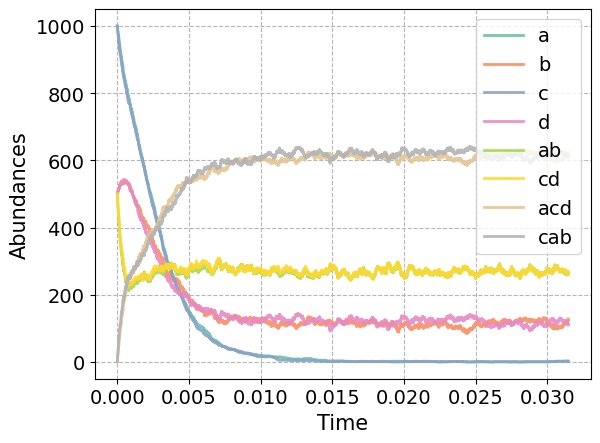

: 

In [ ]:
kinetic_k = [1]*8+[0]*4
initial_conditions = [1000,500]*2+[500]*2+[0]*2
vol = 1
file_XY = "../examples/reactions_autocat.txt"

ab, tim, vols = chemistry(method= "Gillespie",
                          iterations= 20000,
                          file= file_XY,
                          initial_food= initial_conditions,
                          k= kinetic_k,
                          V= vol                          
                          )
plt.figure()
colors = plt.get_cmap('Set2').colors
plt.grid()
species_XY = obtain_species(read_file(file_XY))
print(species_XY)
for i in range(len(species_XY)):
    
    plt.plot(tim, ab[:, i], label=species_XY[i], color=colors[i], alpha=0.9, linewidth= 2)

plt.grid(True, linestyle='--', alpha=0.9)
plt.xlabel("Time", fontsize= label_fs)
plt.ylabel("Abundances", fontsize= label_fs)
plt.legend(fontsize= legend_fs)
plt.tick_params(axis='both', labelsize= tick_fs)

Successfully loaded 7 simulation results.


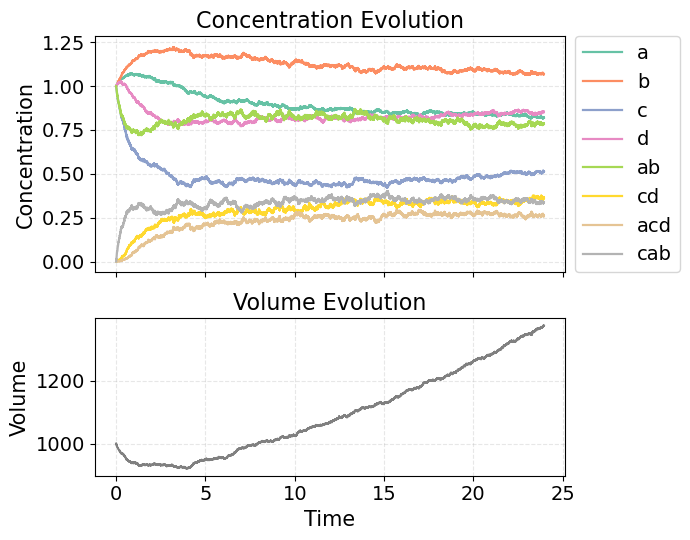

In [12]:
species = obtain_species(read_file('../examples/reactions_autocat.txt'))
abundances, times, V = load_list_pickle('abcd_ctflux.pkl')[-1]
plot(abundances, times, V, species)

# ABCD - mal

Successfully loaded 3 simulation results.


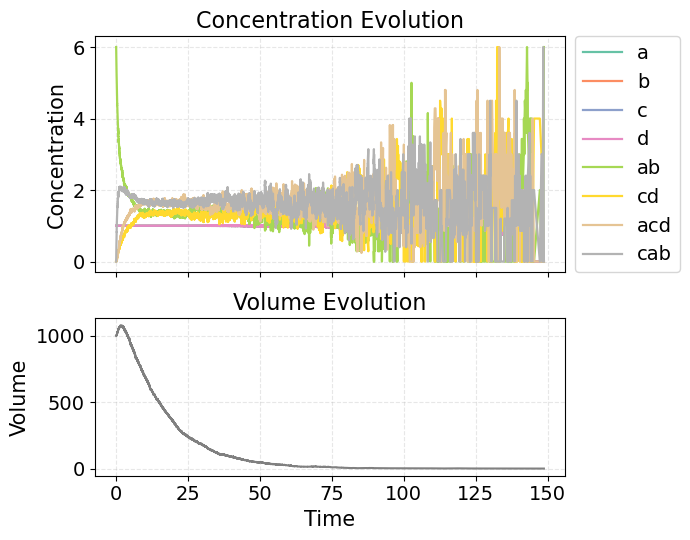

In [59]:
species = obtain_species(read_file('../examples/reactions_autocat.txt'))
abundances, times, V = load_list_pickle('abcd_protocell_bad.pkl')[-1]
plot(abundances, times, V, species)

Successfully loaded 5 simulation results.


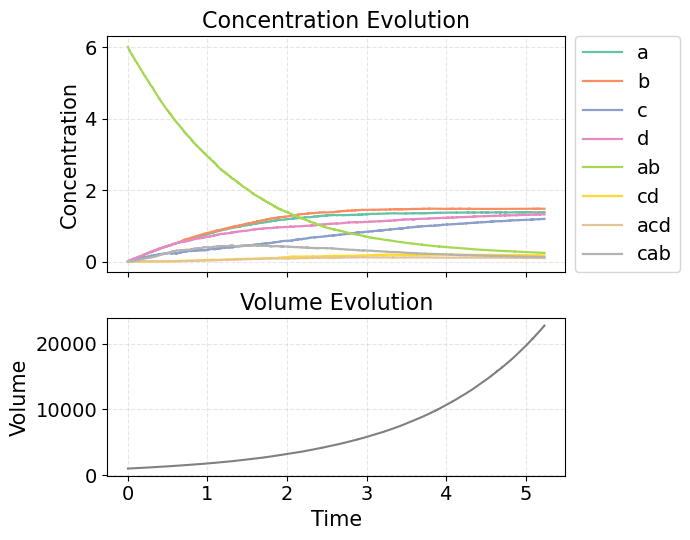

In [13]:
species = obtain_species(read_file('../examples/reactions_autocat.txt'))
abundances, times, V = load_list_pickle('abcd_ctflux_bad.pkl')[-1]

plot(abundances, times, V, species)